In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from keras import optimizers,regularizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']

    stock.get(string)
    price = stock
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    
    prices.append(price)


/home/andrea/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                         open      high       low     close   volume  \
2017-08-11 21:30:00  156.6000  156.6700  156.5000  156.5900   634426   
2017-08-11 21:45:00  156.5900  157.7900  156.0700  157.0700  2984871   
2017-08-11 22:00:00  157.0800  157.9800  156.7300  157.8000  1885166   
2017-08-11 22:15:00  157.8000  158.5728  157.5700  158.1200  1830954   
2017-08-11 22:30:00  158.1100  158.3600  157.4334  157.5500  1206286   
2017-08-11 22:45:00  157.5600  158.0300  157.0500  157.5834  1068004   
2017-08-11 23:00:00  157.5700  157.7800  157.1900  157.4600   682451   
2017-08-11 23:15:00  157.4444  157.6400  157.1300  157.6141   608206   
2017-08-11 23:30:00  157.6100  157.7600  157.1200  157.2600   772410   
2017-08-11 23:45:00  157.2600  157.8000  157.2600  157.6290   445590   
2017-08-12 00:00:00  157.6400  157.8700  157.4900  157.6500   481998   
2017-08-12 00:15:00  157.6500  157.8800  157.4200  157.7100   468338   
2017-08-12 00:30:00  157.7100  157.8800  157.6448  157.7200   32

                          open       high        low      close  volume  \
2017-08-11 21:30:00   960.0000   960.6000   959.9500   960.0000   71440   
2017-08-11 21:45:00   960.3299   961.4650   952.8294   954.2566  279998   
2017-08-11 22:00:00   954.4400   958.2500   951.3800   957.5900  210409   
2017-08-11 22:15:00   956.9300   962.0100   955.8700   960.3500  144766   
2017-08-11 22:30:00   960.0100   964.2074   959.0196   963.6700  133706   
2017-08-11 22:45:00   963.5948   969.9900   962.2400   968.4600  216446   
2017-08-11 23:00:00   968.8000   970.3900   965.1101   965.2600  122921   
2017-08-11 23:15:00   965.2288   968.8300   964.0550   968.3187   89561   
2017-08-11 23:30:00   968.3606   968.5000   964.6500   965.1200   85315   
2017-08-11 23:45:00   965.6200   968.2900   965.5850   967.1000   69785   
2017-08-12 00:00:00   967.7400   968.7590   966.6200   967.3300   74374   
2017-08-12 00:15:00   967.4300   969.4300   966.8400   968.0450   62912   
2017-08-12 00:30:00   968

                          open       high        low      close  volume  \
2017-08-11 21:30:00   923.7100   923.7100   923.5000   923.6150   44259   
2017-08-11 21:45:00   923.6200   925.1969   921.7946   922.4250  107239   
2017-08-11 22:00:00   922.7500   924.9900   921.2200   924.6900   80993   
2017-08-11 22:15:00   924.3600   926.7599   923.0150   925.0000   75359   
2017-08-11 22:30:00   924.4600   927.1400   924.4600   926.4550   35055   
2017-08-11 22:45:00   926.4972   930.3900   925.8500   930.1100   84703   
2017-08-11 23:00:00   930.0150   931.6400   929.6255   930.4900   40897   
2017-08-11 23:15:00   930.4900   932.6600   929.5000   932.3501   40463   
2017-08-11 23:30:00   932.5512   932.9300   929.5600   930.0700   49205   
2017-08-11 23:45:00   930.0001   932.9300   930.0001   932.9300   25389   
2017-08-12 00:00:00   932.2301   933.3311   931.4000   931.4000   28480   
2017-08-12 00:15:00   931.9000   933.3600   931.6700   932.5400   13568   
2017-08-12 00:30:00   932

                         open      high       low     close   volume  \
2017-08-11 21:30:00   71.6100   71.6200   71.4900   71.6100   555810   
2017-08-11 21:45:00   71.6200   71.8400   71.3900   71.4700  1026107   
2017-08-11 22:00:00   71.4700   71.7350   71.2800   71.7100  1126253   
2017-08-11 22:15:00   71.7000   71.9000   71.6100   71.7300   722064   
2017-08-11 22:30:00   71.7200   71.8100   71.6700   71.7500   477263   
2017-08-11 22:45:00   71.7500   71.9146   71.7250   71.8950   469477   
2017-08-11 23:00:00   71.8925   72.0000   71.8300   71.9200   418456   
2017-08-11 23:15:00   71.9200   71.9302   71.8000   71.9300   381403   
2017-08-11 23:30:00   71.9250   72.0300   71.8100   71.8450   667605   
2017-08-11 23:45:00   71.8500   72.1450   71.8350   72.1237   564234   
2017-08-12 00:00:00   72.1200   72.1400   71.9600   72.0400   479290   
2017-08-12 00:15:00   72.0400   72.2700   72.0000   72.2300   600164   
2017-08-12 00:30:00   72.2252   72.3600   72.1900   72.2048   43

                         open      high       low     close   volume  \
2017-08-11 21:30:00  167.9500  167.9500  167.7500  167.8400   338379   
2017-08-11 21:45:00  167.9000  168.3999  167.1000  167.2800  1306319   
2017-08-11 22:00:00  167.3000  167.8800  166.8500  167.6500   909830   
2017-08-11 22:15:00  167.6500  168.8200  167.4736  168.1011   880668   
2017-08-11 22:30:00  168.0900  168.3500  167.7503  167.9780   500290   
2017-08-11 22:45:00  167.9729  168.3423  167.7584  168.2300   457547   
2017-08-11 23:00:00  168.2400  168.5100  167.9000  167.9800   455613   
2017-08-11 23:15:00  167.9725  168.0400  167.6899  167.8750   384437   
2017-08-11 23:30:00  167.8750  167.9900  167.5000  167.5300   404442   
2017-08-11 23:45:00  167.5300  167.9900  167.3600  167.9792   454548   
2017-08-12 00:00:00  167.9600  168.2700  167.8100  167.8970   398413   
2017-08-12 00:15:00  167.8600  168.2700  167.7900  168.1900   291157   
2017-08-12 00:30:00  168.1900  168.2800  168.0100  168.1200   20

                        open     high     low    close   volume  close_2_sma  \
2017-08-11 21:30:00  36.2600  36.2800  36.110  36.1200   524404     36.12000   
2017-08-11 21:45:00  36.1300  36.4000  36.095  36.1700   965617     36.14500   
2017-08-11 22:00:00  36.1800  36.2500  36.140  36.2250   932875     36.19750   
2017-08-11 22:15:00  36.2200  36.2900  36.115  36.2000   919540     36.21250   
2017-08-11 22:30:00  36.2050  36.2200  36.130  36.1600   522556     36.18000   
2017-08-11 22:45:00  36.1600  36.2100  36.120  36.1200   511218     36.14000   
2017-08-11 23:00:00  36.1266  36.1400  36.080  36.0800   447343     36.10000   
2017-08-11 23:15:00  36.0850  36.1000  36.060  36.0850   530622     36.08250   
2017-08-11 23:30:00  36.0850  36.1050  35.930  35.9500   726239     36.01750   
2017-08-11 23:45:00  35.9500  36.0300  35.945  36.0201   632103     35.98505   
2017-08-12 00:00:00  36.0200  36.0450  35.960  35.9650   457020     35.99255   
2017-08-12 00:15:00  35.9600  36.0600  3

                        open     high      low    close   volume  close_2_sma  \
2017-08-11 21:30:00  31.2300  31.2300  31.1525  31.1600   549928     31.16000   
2017-08-11 21:45:00  31.1500  31.2150  31.0400  31.2000  1350628     31.18000   
2017-08-11 22:00:00  31.1900  31.2650  31.1500  31.2200   870726     31.21000   
2017-08-11 22:15:00  31.2100  31.4600  31.1900  31.4000  1304361     31.31000   
2017-08-11 22:30:00  31.3940  31.4250  31.3267  31.3500   626295     31.37500   
2017-08-11 22:45:00  31.3500  31.3800  31.2950  31.3200   584993     31.33500   
2017-08-11 23:00:00  31.3139  31.3900  31.3000  31.3850   624951     31.35250   
2017-08-11 23:15:00  31.3850  31.3900  31.2900  31.3200   480458     31.35250   
2017-08-11 23:30:00  31.3200  31.3300  31.2500  31.2750   778740     31.29750   
2017-08-11 23:45:00  31.2800  31.3800  31.2700  31.3750   649488     31.32500   
2017-08-12 00:00:00  31.3750  31.4000  31.3500  31.3567   555103     31.36585   
2017-08-12 00:15:00  31.3500

                        open     high      low    close   volume  close_2_sma  \
2017-08-11 21:30:00  40.7600  40.7600  40.7600  40.7600   280137     40.76000   
2017-08-11 21:45:00  40.7600  41.1000  40.7100  40.7800   827654     40.77000   
2017-08-11 22:00:00  40.7800  40.8300  40.6700  40.8150   703579     40.79750   
2017-08-11 22:15:00  40.8100  40.9000  40.7500  40.8550   600131     40.83500   
2017-08-11 22:30:00  40.8550  40.9700  40.8400  40.9000   788215     40.87750   
2017-08-11 22:45:00  40.9000  40.9650  40.8450  40.8600   464989     40.88000   
2017-08-11 23:00:00  40.8700  40.8800  40.8000  40.8200   582079     40.84000   
2017-08-11 23:15:00  40.8250  40.8500  40.8000  40.8100   489278     40.81500   
2017-08-11 23:30:00  40.8200  40.8700  40.7600  40.8070   890171     40.80850   
2017-08-11 23:45:00  40.8054  40.8950  40.7700  40.8700   398718     40.83850   
2017-08-12 00:00:00  40.8700  40.9150  40.8700  40.8700   336398     40.87000   
2017-08-12 00:15:00  40.8750

                         open      high       low     close   volume  \
2017-08-11 21:30:00  157.1400  157.3000  156.9500  157.0000   474134   
2017-08-11 21:45:00  156.9300  159.0000  154.5100  157.8900  5272074   
2017-08-11 22:00:00  157.9200  158.4800  153.6500  155.3300  3290127   
2017-08-11 22:15:00  155.3300  158.1700  155.0200  156.9200  2268074   
2017-08-11 22:30:00  156.9099  158.4000  156.6100  156.9578  1451017   
2017-08-11 22:45:00  156.9650  157.0500  155.2700  155.2900  1500508   
2017-08-11 23:00:00  155.3000  155.8899  155.0600  155.3300  1008827   
2017-08-11 23:15:00  155.3200  155.4500  154.3500  154.6705  1114193   
2017-08-11 23:30:00  154.6402  155.3040  152.9100  153.0200  1532735   
2017-08-11 23:45:00  153.0700  154.3500  153.0000  153.7900  1121386   
2017-08-12 00:00:00  153.6900  154.8000  153.1100  153.2200  1024626   
2017-08-12 00:15:00  153.2301  155.1700  153.1500  155.1208  1052401   
2017-08-12 00:30:00  155.1100  155.7800  154.8100  155.4000  103

                         open      high       low     close   volume  \
2017-08-11 21:30:00  169.8600  169.8700  169.8400  169.8400   103243   
2017-08-11 21:45:00  169.9800  171.1800  169.5400  170.2400   398456   
2017-08-11 22:00:00  170.2860  170.5000  169.0000  170.3014   276653   
2017-08-11 22:15:00  170.2700  172.1400  170.1800  171.3900   351832   
2017-08-11 22:30:00  171.3450  171.8000  170.7700  171.0568   169822   
2017-08-11 22:45:00  171.0600  171.7200  170.5700  171.5350   174076   
2017-08-11 23:00:00  171.5900  171.8600  171.1100  171.1500   113661   
2017-08-11 23:15:00  171.1500  171.4400  170.6900  171.0800   121713   
2017-08-11 23:30:00  171.0700  171.2000  170.2300  170.3600   133485   
2017-08-11 23:45:00  170.3200  171.3500  170.3110  171.1200   109187   
2017-08-12 00:00:00  171.0900  171.3900  170.9100  171.2100    78435   
2017-08-12 00:15:00  171.2400  171.8800  171.0800  171.7800   117160   
2017-08-12 00:30:00  171.8100  171.9700  171.2700  171.4551   12

                         open      high       low     close  volume  \
2017-08-11 21:30:00  145.2500  145.6400  145.1900  145.2400   39227   
2017-08-11 21:45:00  145.2300  145.3400  144.2900  144.6000  115069   
2017-08-11 22:00:00  144.6400  145.5600  144.1800  145.4500   46967   
2017-08-11 22:15:00  145.4400  145.9400  145.2700  145.4500   55225   
2017-08-11 22:30:00  145.4700  145.9600  145.3300  145.9600   51531   
2017-08-11 22:45:00  145.9799  146.3670  145.8000  146.3000   25343   
2017-08-11 23:00:00  146.3100  146.4400  145.9800  146.1092   40631   
2017-08-11 23:15:00  146.0900  146.1000  145.7400  146.0990   14795   
2017-08-11 23:30:00  146.0850  146.2050  145.5000  145.5000   25499   
2017-08-11 23:45:00  145.5700  146.3200  145.5700  146.2300   16198   
2017-08-12 00:00:00  146.2200  146.3300  145.8700  146.0399   23881   
2017-08-12 00:15:00  146.0300  146.5650  145.9700  146.5200   23591   
2017-08-12 00:30:00  146.5200  146.6700  146.2100  146.2900   38058   
2017-0

                         open      high       low     close  volume  \
2017-08-11 21:30:00  169.8200  170.6300  169.7700  169.7700   56960   
2017-08-11 21:45:00  169.8100  170.3000  169.1800  169.6900   72041   
2017-08-11 22:00:00  169.7000  170.1200  169.3200  169.8700   61635   
2017-08-11 22:15:00  169.9500  170.2700  169.7600  169.7600   42167   
2017-08-11 22:30:00  169.5800  170.1900  169.5800  170.0500   54379   
2017-08-11 22:45:00  170.0700  170.1400  169.5000  169.7700   40154   
2017-08-11 23:00:00  169.7800  170.1100  169.7200  170.1100   30326   
2017-08-11 23:15:00  170.0925  170.3250  169.7700  169.8400   39234   
2017-08-11 23:30:00  169.8079  169.8600  169.2600  169.2800   45082   
2017-08-11 23:45:00  169.3100  169.5700  169.2700  169.5090   37699   
2017-08-12 00:00:00  169.5300  169.5500  169.0439  169.2018   37320   
2017-08-12 00:15:00  169.2600  169.2600  169.0500  169.2100   22549   
2017-08-12 00:30:00  169.2100  169.2790  169.0900  169.1250   23585   
2017-0

                         open      high       low     close  volume  \
2017-08-11 21:30:00   80.5800   80.5800   80.5000   80.5700   80173   
2017-08-11 21:45:00   80.5900   80.9687   80.4300   80.7400  171767   
2017-08-11 22:00:00   80.7400   81.1000   80.6600   81.1000  208314   
2017-08-11 22:15:00   81.1000   81.3400   80.9400   81.1450  235486   
2017-08-11 22:30:00   81.1300   81.1547   80.9600   81.0500   94125   
2017-08-11 22:45:00   81.0550   81.1200   80.8900   81.0200   99484   
2017-08-11 23:00:00   81.0300   81.1700   80.9300   80.9700   82660   
2017-08-11 23:15:00   80.9700   80.9890   80.8400   80.9800   42728   
2017-08-11 23:30:00   80.9900   81.0300   80.7200   80.7500   58992   
2017-08-11 23:45:00   80.7500   81.0150   80.7500   81.0150  151747   
2017-08-12 00:00:00   81.0000   81.0000   80.8800   80.9052   92549   
2017-08-12 00:15:00   80.9100   81.0800   80.8800   81.0276  110414   
2017-08-12 00:30:00   81.0300   81.1300   80.8800   80.9000  131287   
2017-0

                         open      high       low     close  volume  \
2017-08-11 21:30:00  240.0500  240.3700  240.0500  240.3700   52788   
2017-08-11 21:45:00  240.0100  241.1000  238.7000  240.8200  159282   
2017-08-11 22:00:00  240.9100  241.8799  240.1150  241.5600   83630   
2017-08-11 22:15:00  241.5000  244.2700  241.1800  243.0200  108062   
2017-08-11 22:30:00  243.0950  243.4450  242.7300  243.4300   29143   
2017-08-11 22:45:00  243.4000  243.8000  243.0200  243.4800   29773   
2017-08-11 23:00:00  243.5126  244.1300  243.2100  243.3100   39305   
2017-08-11 23:15:00  243.3500  243.3500  242.5900  242.7400   27357   
2017-08-11 23:30:00  242.7500  243.1400  241.7300  241.8000   29705   
2017-08-11 23:45:00  241.9000  242.9000  241.8100  242.9000   33794   
2017-08-12 00:00:00  242.8900  242.9400  242.5100  242.6900   28229   
2017-08-12 00:15:00  242.6200  243.6500  242.5300  243.6100   18371   
2017-08-12 00:30:00  243.6500  244.3350  243.6500  243.8900   24884   
2017-0

                        open     high      low    close  volume  close_2_sma  \
2017-08-11 21:30:00  57.8500  57.8500  57.8000  57.8000  159722     57.80000   
2017-08-11 21:45:00  57.8200  58.0650  57.5800  57.9100  350315     57.85500   
2017-08-11 22:00:00  57.9150  58.0800  57.8000  57.9600  534036     57.93500   
2017-08-11 22:15:00  57.9600  58.1600  57.8800  58.0300  340263     57.99500   
2017-08-11 22:30:00  58.0200  58.0750  57.9400  58.0200  226408     58.02500   
2017-08-11 22:45:00  58.0300  58.1950  57.9250  58.0800  384728     58.05000   
2017-08-11 23:00:00  58.0758  58.2500  58.0500  58.0900  240584     58.08500   
2017-08-11 23:15:00  58.0800  58.1400  58.0300  58.0400  172804     58.06500   
2017-08-11 23:30:00  58.0500  58.1300  57.8300  57.8799  242377     57.95995   
2017-08-11 23:45:00  57.8800  58.0400  57.8800  58.0000  144537     57.93995   
2017-08-12 00:00:00  58.0100  58.0850  57.9600  57.9900  201739     57.99500   
2017-08-12 00:15:00  57.9850  58.2050  5

                        open     high      low    close   volume  close_2_sma  \
2017-08-11 21:30:00  72.5200  72.6000  72.3800  72.4850   206790     72.48500   
2017-08-11 21:45:00  72.4790  72.6800  72.0400  72.4000   363370     72.44250   
2017-08-11 22:00:00  72.4000  72.5310  72.0800  72.4281   345157     72.41405   
2017-08-11 22:15:00  72.4200  72.4800  72.1750  72.1850   243726     72.30655   
2017-08-11 22:30:00  72.1800  72.2638  72.0900  72.1263   437460     72.15565   
2017-08-11 22:45:00  72.1200  72.2200  71.8200  72.0100   451191     72.06815   
2017-08-11 23:00:00  72.0150  72.1700  71.9500  72.1600   284874     72.08500   
2017-08-11 23:15:00  72.1689  72.3100  72.1500  72.1900   139002     72.17500   
2017-08-11 23:30:00  72.1900  72.2200  72.0500  72.0500   188718     72.12000   
2017-08-11 23:45:00  72.0536  72.0900  71.9800  72.0200   167437     72.03500   
2017-08-12 00:00:00  72.0200  72.0644  71.9650  72.0644   113305     72.04220   
2017-08-12 00:15:00  72.0600

                         open      high       low     close  volume  \
2017-08-11 21:30:00  156.5100  156.5100  156.5000  156.5100   42554   
2017-08-11 21:45:00  156.5600  157.6800  156.4100  157.1700  158810   
2017-08-11 22:00:00  157.2100  157.5800  157.0510  157.5350  119761   
2017-08-11 22:15:00  157.5800  157.7400  157.3100  157.3700  118471   
2017-08-11 22:30:00  157.3791  157.4050  157.0300  157.1450   79631   
2017-08-11 22:45:00  157.1327  157.5300  157.0200  157.4160   42797   
2017-08-11 23:00:00  157.4400  157.6300  157.4400  157.5100   62630   
2017-08-11 23:15:00  157.4900  157.5000  157.1400  157.1500   49874   
2017-08-11 23:30:00  157.1300  157.1700  156.8400  156.9150   49767   
2017-08-11 23:45:00  156.9200  157.1300  156.8100  157.1100   31110   
2017-08-12 00:00:00  157.1050  157.2900  156.9300  157.0000   34152   
2017-08-12 00:15:00  157.0200  157.1534  156.9300  157.0000   36724   
2017-08-12 00:30:00  157.0150  157.2500  156.8800  157.2000   32724   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-11 21:30:00  52.3900  52.3900  52.3500  52.3500   161282     52.35000   
2017-08-11 21:45:00  52.3800  52.6900  52.2900  52.4100   284561     52.38000   
2017-08-11 22:00:00  52.4100  52.6400  52.3400  52.5600   263643     52.48500   
2017-08-11 22:15:00  52.5500  52.6500  52.4750  52.5850   188297     52.57250   
2017-08-11 22:30:00  52.5850  52.7400  52.5200  52.7300   167159     52.65750   
2017-08-11 22:45:00  52.7350  52.8100  52.6400  52.6800   194050     52.70500   
2017-08-11 23:00:00  52.6750  52.7300  52.6600  52.7100   100556     52.69500   
2017-08-11 23:15:00  52.7050  52.7100  52.5900  52.6150   111022     52.66250   
2017-08-11 23:30:00  52.6167  52.6300  52.4950  52.5050   133613     52.56000   
2017-08-11 23:45:00  52.5050  52.6400  52.5050  52.6350    88491     52.57000   
2017-08-12 00:00:00  52.6350  52.6886  52.5950  52.6000    94217     52.61750   
2017-08-12 00:15:00  52.6050

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

In [3]:
def buildModel(l,n,d):
    model = Sequential()  
    model.add(Dense(n, input_dim=111,activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/2), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/4), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

    return model

def findMaxAcc(valacc,valloss):
	prevloss=valloss[0]
	for i in range(1,len(valloss)):
		if(valloss[i]>prevloss):
			return valacc[i-1]
	#print('Problems with find MaxAccuracy')
	return valacc[len(valacc)-1]
def findMaxAccStep(valacc,valloss):
	prevloss=valloss[0]
	for i in range(1,len(valloss)):
		if(valloss[i]>prevloss):
			return i-1
	#print('Problems with find MaxAccuracy')
	return len(valacc)-1

Working on... AAPL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: AAPL


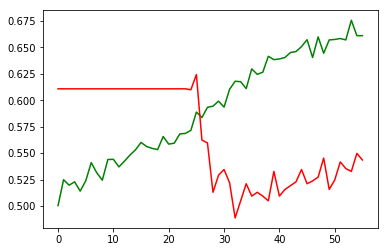

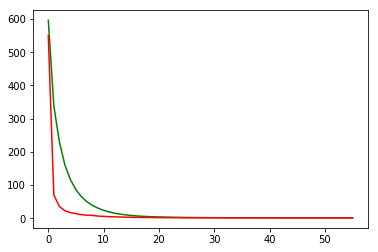

Working on... AMZN
working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: AMZN


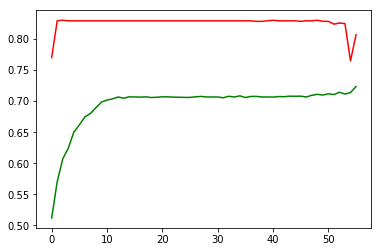

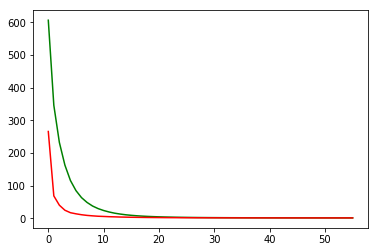

Working on... GOOGL
working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: GOOGL


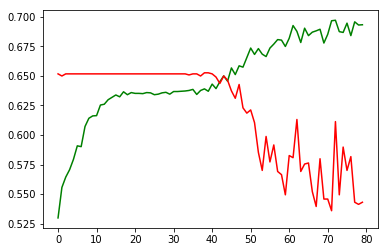

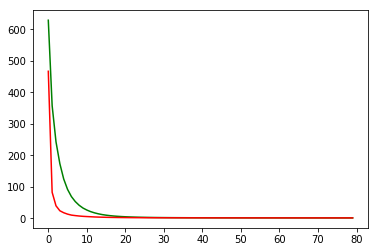

Working on... MSFT
working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: MSFT


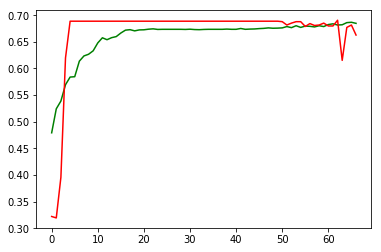

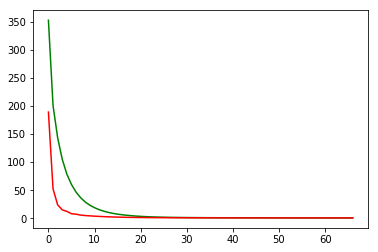

Working on... FB
working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: FB


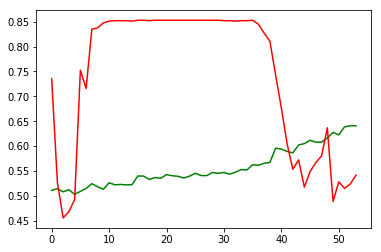

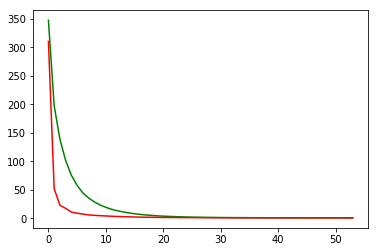

Working on... INTC


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: INTC


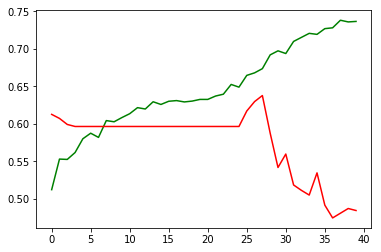

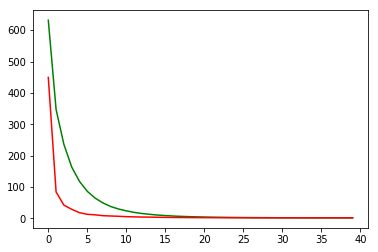

Working on... CSCO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: CSCO


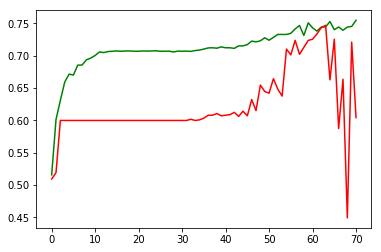

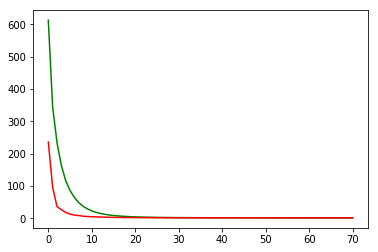

Working on... CMCSA


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: CMCSA


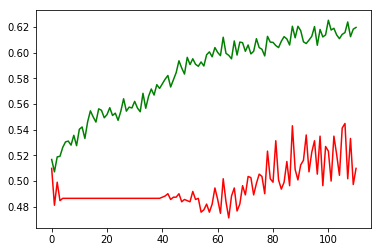

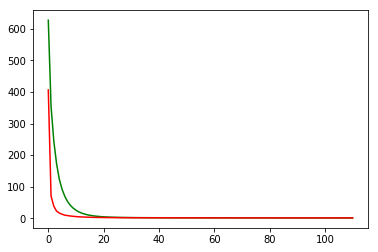

Working on... NVDA


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: NVDA


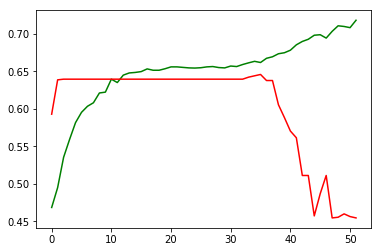

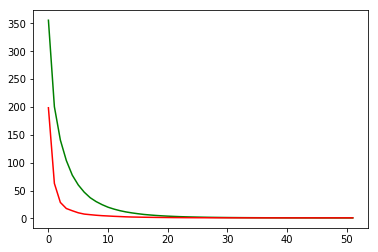

Working on... NFLX


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: NFLX


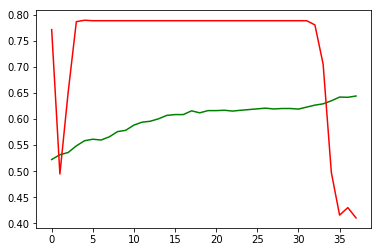

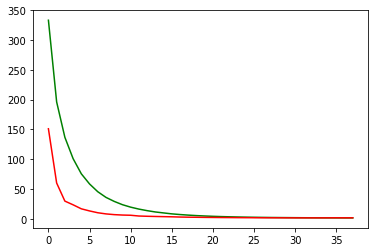

Working on... ADBE
working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

Chart for BEST MODEL FOR: ADBE


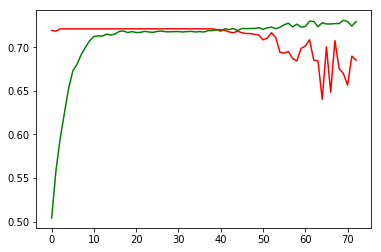

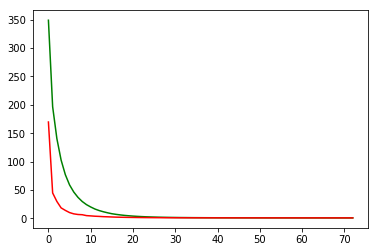

Working on... AMGN
working on d,u and l 0.5 64 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/an

working on d,u and l 0.5 128 0.05


/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/home/andrea/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


KeyboardInterrupt: 

In [6]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=0) 
earlyStopping=EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
       
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        

        lspace=[0.05]
        dropspace=[0.5]
        uspace=[64,128]
        bestsvm=None
        bestca=[]
        bestcl=[]
        maxacc=0
        cvacc=0
        maxu=0
        maxl=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for d in dropspace:
            for u in uspace:
                #print()
                for l in lspace:
                    
                   
                    print('=========================================================')
                    print('working on d,u and l',d,u,l)
                    
                    cvacclist=[]
                    #faccio cross validation
                    #start with 40% as train and 10% for validation and then i move in percentege
                    # 0-40 40-50
                    # 0-50 50-60
                    # 0-60 60-70 
                    #etc test set is completely external i do in some way error extimation changin the ticker
                    trainpoint=math.floor(len(x_tv)*0.40)
                    dimval=math.floor(trainpoint*0.25)
                    endval=trainpoint+dimval

                    for i in range(0,6):
                        #print('-----')
                        x_train=x_tv[0:trainpoint]
                        y_train=y_tv[0:trainpoint]
                        x_val=x_tv[trainpoint:endval]
                        y_val=y_tv[trainpoint:endval]

                        trainpoint=trainpoint+dimval
                        endval=endval+dimval
                        model=buildModel(l,u,d)
                        x_train,y_train=smote(x_train,y_train)
                        if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                            x_val,y_val=smote(x_val,y_val)
                        else:
                            totu=totu+1

                        history=model.fit(x_train, y_train, nb_epoch = 200,batch_size =128, verbose=0, validation_data=(x_val, y_val),
                                          shuffle=True,callbacks=[earlyStopping])



                       
                       
                        
                        
                        maxAcc=maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                        cvacclist.append(maxAcc)
                    cvacc=sum(cvacclist)/len(cvacclist)
                    if(cvacc>maxacc):
                        maxacc=cvacc
                        maxu=u
                        maxl=l
                        
                    
                    
                    print('=========================================================')
        bestmodel=model=buildModel(maxl,maxu,0.5)
        history=model.fit(x_tv, y_tv, nb_epoch = 200,batch_size =128, verbose=0, validation_data=(x_test, y_test),
                                          shuffle=True,callbacks=[earlyStopping])
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('Chart for BEST MODEL FOR:',files[o-1])
        plt.plot(history.history['acc'],'g')
        plt.plot(history.history['val_acc'],'r')
        plt.show()
        plt.plot(history.history['loss'],'g')
        plt.plot(history.history['val_loss'],'r')
        plt.show()
        

            